In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv', header = 0)


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
df.rename({'default.payment.next.month':"default" } , axis = 'columns' , inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.drop('ID', axis = 1 , inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

In [ ]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
df['SEX'].unique()

array([2, 1])

In [ ]:
len(df.loc[(df['MARRIAGE'] == 0)])

54

In [ ]:
len(df.loc[(df['EDUCATION'] == 0)])

14

In [ ]:
len(df)

30000

In [ ]:
df_without_missing = df.loc[(df['MARRIAGE'] != 0) & (df['EDUCATION'] != 0)]


In [ ]:
len(df_without_missing)

29932

In [ ]:
df_no_default = df_without_missing[df_without_missing['default'] == 0]
print(len(df_no_default))
df_default = df_without_missing[df_without_missing['default'] == 1]
print(len(df_default))


23301
6631


In [ ]:
df_no_default_downsampled = resample(df_no_default , replace = False , n_samples =800 , random_state = 2)
df_default_downsampled = resample(df_default , replace = False , n_samples =800 , random_state = 2)


In [ ]:
df_all_downsampled = pd.concat([df_no_default_downsampled ,df_default_downsampled ])
df_all_downsampled.shape


1600

In [ ]:
x =  df_all_downsampled.drop('default', axis = 1).copy()
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7315,200000.0,1,2,2,44,-1,-1,-1,-1,-1,...,1230.0,3393.0,1340.0,3416.0,2306.0,1234.0,3510.0,1344.0,3426.0,6324.0
27225,90000.0,1,2,1,31,0,0,2,0,0,...,91508.0,86167.0,49479.0,50704.0,20000.0,0.0,3752.0,1726.0,2003.0,2000.0
29067,120000.0,2,3,1,50,0,0,0,0,0,...,112482.0,115046.0,80987.0,85921.0,5500.0,4200.0,4552.0,3100.0,6416.0,0.0
22159,230000.0,2,1,2,29,-2,-2,-2,-2,-2,...,0.0,0.0,100.0,900.0,0.0,0.0,0.0,100.0,900.0,715.0
22218,250000.0,2,1,2,26,0,0,0,0,0,...,43194.0,41381.0,33246.0,32948.0,2027.0,2020.0,1510.0,1000.0,1000.0,7000.0


In [ ]:
x.shape

(1600, 23)

In [ ]:
y =df_all_downsampled['default'].copy()
y.head()


7315     0
27225    0
29067    0
22159    0
22218    0
Name: default, dtype: int64

# One-hot encoding (convert the columns of categorical data into a multiple columns of binary values)

In [ ]:
pd.get_dummies(x, columns= ['SEX']).head() #SEX column has changed

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2
7315,200000.0,2,2,44,-1,-1,-1,-1,-1,-1,...,1340.0,3416.0,2306.0,1234.0,3510.0,1344.0,3426.0,6324.0,1,0
27225,90000.0,2,1,31,0,0,2,0,0,0,...,49479.0,50704.0,20000.0,0.0,3752.0,1726.0,2003.0,2000.0,1,0
29067,120000.0,3,1,50,0,0,0,0,0,0,...,80987.0,85921.0,5500.0,4200.0,4552.0,3100.0,6416.0,0.0,0,1
22159,230000.0,1,2,29,-2,-2,-2,-2,-2,-2,...,100.0,900.0,0.0,0.0,0.0,100.0,900.0,715.0,0,1
22218,250000.0,1,2,26,0,0,0,0,0,0,...,33246.0,32948.0,2027.0,2020.0,1510.0,1000.0,1000.0,7000.0,0,1


In [ ]:
x_encoded = pd.get_dummies(x, columns= ['MARRIAGE', 'EDUCATION', 'SEX' , 'PAY_0', 'PAY_2' , 'PAY_3', 'PAY_4','PAY_5', 'PAY_6'  ]) 
x_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
7315,200000.0,44,310.0,2226.0,1230.0,3393.0,1340.0,3416.0,2306.0,1234.0,...,0,1,0,0,0,0,0,0,0,0
27225,90000.0,31,77107.0,93894.0,91508.0,86167.0,49479.0,50704.0,20000.0,0.0,...,0,0,1,0,0,0,0,0,0,0
29067,120000.0,50,109372.0,111564.0,112482.0,115046.0,80987.0,85921.0,5500.0,4200.0,...,0,0,1,0,0,0,0,0,0,0
22159,230000.0,29,360.0,0.0,0.0,0.0,100.0,900.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
22218,250000.0,26,50122.0,44742.0,43194.0,41381.0,33246.0,32948.0,2027.0,2020.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
x_encoded.shape ## The data frame became 88 columns instead of 23

(1600, 80)

Split the data 

In [ ]:
x_train , x_test , y_train, y_test = train_test_split(x_encoded , y , test_size = 0.3 , random_state = 2)

In [ ]:
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)


In [ ]:
model_svm = SVC(random_state = 2) #support vector classifier
model_svm.fit(x_train_scaled , y_train)
model_logestic =  LogisticRegression()
model_logestic.fit(x_train_scaled , y_train)

LogisticRegression()

In [ ]:
y_pred = model_svm.predict(x_train)
y_pred_logestic = model_logestic.predict(x_train)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
cm = confusion_matrix(y_train, y_pred )
print(f"Accuracy of the LR model is {accuracy_score(y_pred_logestic, y_train)}")
print(f"Accuracy of the SVM model is {accuracy_score(y_pred, y_train)}")

Accuracy of the LR model is 0.5214285714285715
Accuracy of the SVM model is 0.49642857142857144


In [ ]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    # swap top left and top right elements
    cm[[0, 1], [1, 0]] = cm[[0, 0], [1, 0]]

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('cool') ##https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>],
       [<Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>,
        <Axes: title={'center': 'BILL_AMT4'}>],
       [<Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
    

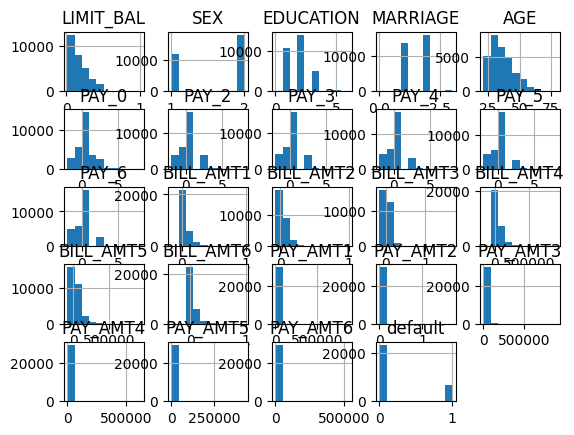

In [ ]:
df.hist()

In [ ]:
y_pred = model_svm.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[  0 236]
 [  0 244]]
Accuracy :  0.5083333333333333
Sensitivity :  0.0
Specificity :  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
print(len(y_pred))

480


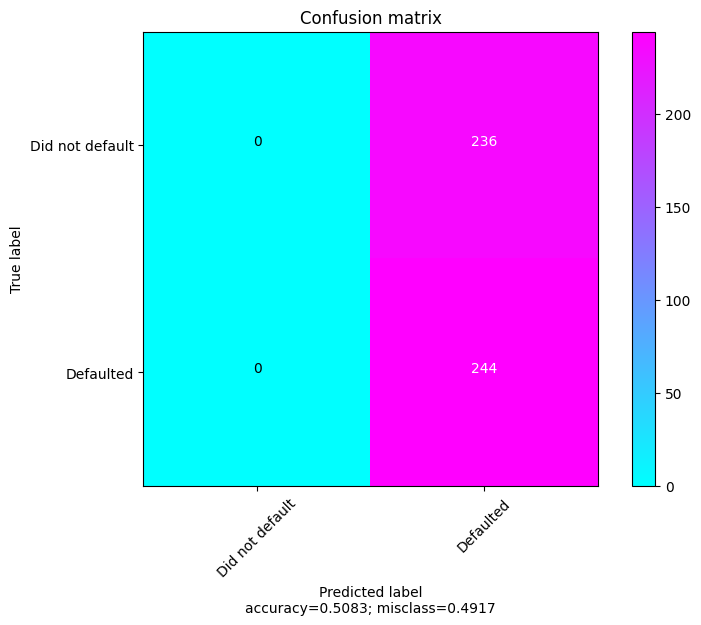

In [ ]:
plot_confusion_matrix(cm1, 
                      ['Did not default', 'Defaulted'] ,
                      title = 'Confusion matrix' ,
                      cmap = None, 
                      normalize = False)

In [ ]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred , y_test)))

Accuracy 50.83%


In [ ]:
param_grid = [{
    'C': [0.5 , 1 , 10 , 100],
    'gamma':['scale', 1 , 0.1, 0.01, 0.001 , 0.0001],
    'kernel' : ['rbf']},
    ]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5 ,
    scoring ='accuracy',
    verbose = 0
)
optimal_params.fit(x_train_scaled , y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
model_svm1 = SVC(random_state = 2 , C = 0.5 , gamma = 'scale', kernel= 'rbf' ) #support vector classifier
model_svm1.fit(x_train_scaled , y_train)


SVC(C=0.5, random_state=2)

In [ ]:
y_pred1 = model_svm1.predict(x_test)
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test,y_pred1 )))

Accuracy 50.83%


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
